In [1]:
import pandas as pd

In [2]:
df = pd.read_spss("./HBAT/HBAT_MDS.sav")
df

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,9.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,4.0,6.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
175,4.0,9.0,9.0,2.0,9.0,0.0,NaN,NaN,NaN,NaN
176,9.0,4.0,4.0,9.0,9.0,2.0,0.0,NaN,NaN,NaN
177,9.0,9.0,3.0,9.0,9.0,3.0,9.0,0.0,NaN,NaN
178,9.0,3.0,1.0,9.0,1.0,1.0,8.0,9.0,0.0,NaN


In [3]:
names = df.columns

In [4]:
names

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10'],
      dtype='object')

In [5]:
S = 10
N = int(len(df)/S)
frames = [ df.iloc[i*S:(i+1)*S].copy() for i in range(N+1) ]

In [16]:
import numpy as np
cum_arr = frames[0].to_numpy()
for i in range(1,N):
    arr = frames[i].to_numpy()
    cum_arr = np.add(cum_arr,arr)

In [31]:
print(cum_arr[2])

[73. 83.  0. nan nan nan nan nan nan nan]


In [25]:
arr = df[:10].to_numpy()

In [18]:
X = cum_arr

In [19]:
from sklearn import manifold

In [20]:
import numpy as np
Xprime = np.nan_to_num(X)

In [21]:
Xprime = np.squeeze(Xprime)
Xprime = Xprime + Xprime.T 

In [22]:
Xprime

array([[  0.,  61.,  73., 138., 134., 107., 135., 138., 136.,  69.],
       [ 61.,   0.,  83., 133., 134., 137., 117., 137.,  91.,  55.],
       [ 73.,  83.,   0., 118., 106., 141., 108., 113.,  61., 129.],
       [138., 133., 118.,   0.,  55., 107., 140., 132., 135., 135.],
       [134., 134., 106.,  55.,   0., 137., 141., 133.,  53., 135.],
       [107., 137., 141., 107., 137.,   0., 107., 114.,  79., 117.],
       [135., 117., 108., 140., 141., 107.,   0., 139., 129.,  55.],
       [138., 137., 113., 132., 133., 114., 139.,   0., 134., 136.],
       [136.,  91.,  61., 135.,  53.,  79., 129., 134.,   0., 137.],
       [ 69.,  55., 129., 135., 135., 117.,  55., 136., 137.,   0.]])

In [23]:
mds = manifold.MDS(2, dissimilarity='precomputed')
coords = mds.fit_transform(Xprime)
x, y = coords[:, 0], coords[:, 1]

In [25]:
import matplotlib.pyplot as plt

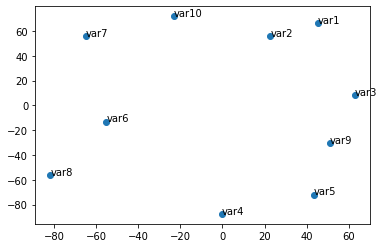

In [26]:
fig, ax = plt.subplots()
ax.scatter(x, y)
for (varname, _x, _y) in zip(names, x, y):
    ax.annotate(varname, (_x, _y))
plt.show()